In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A one dimensional Ornstein−Uhlenbeck process

## Definition

A simple Ornstein--Uhlenbeck process takes the form
$$\mathrm{d}y(t) = -\theta y(t)\mathrm{d}t + \sigma \mathrm{d}W(t), $$
with $\theta$ the drift term and $\sigma$ diffusion term. The term $\mathrm{d}W(t)$ comprises the Brownian motion

## Integrating with an Euler−Maruyama scheme

This is the equivalent of the simplest Euler integrator for stochastic processes. You can find more specifics on the Euler−Maruyama onwikipedia

In [2]:
# The drift and diffusion
theta = 0.3
sigma = 0.1

# The total integration time
t_start = 0
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

For the integration initialise an array $y$ and a normally distributed noise $\mathrm{d}W(t)$

In [3]:
# Initialise the array y
y = np.zeros([time.size])

# Generate a Wiener process with a scale of np.sqrt(delta_t)
dW = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = [time.size,1])
# you can equivalently use np.sqrt(delta_t) * np.random.normal(loc=0, scale=1,size=[time.size,1])

# Give some small random initial conditions
y[0]=np.random.normal(size = 1) / 10

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dW[i] 

## Visualising the process

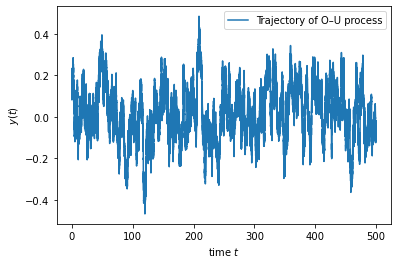

In [4]:
#This is the stochastic trajectory over time
plt.plot(time, y , label = r'Trajectory of O–U process')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

## Obtaining the Kramers−Moyal coefficients

We will now implement the KM package to calculate the Kramers−Moyal coefficients

In [5]:
# Import your (favourite) package to calculate Kramers−Moyal coefficients
# You will need only km to perform the calculation
from kramersmoyal import km

In [6]:
# Choose the size of your target space 
bins = np.array([5000])

# Introduce the desired orders to calculate
# Please keep the  [0]  term. It is the normalisation. 
powers = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8]])

# Choose a desired bandwidth bw
# this is similar to the inverse of number of bins
bw = 0.1

# Calculate the Kramers−Moyal coefficients
kmc, edges = km(y, bw = bw, bins = bins, powers = powers)

# The K−M coefficients are stacked along the fisrt dim of the
# kmc array, so kmc[1,:] is the first K−M coefficient, kmc[2,:]
# is the second, etc. etc.

## Visualising the Kramers−Moyal coefficients

Lets now visualise the obtained Kramers−Moyal coefficients
Let's plot the first Kramers−Moyal coefficients, i.e., the drift coefficient

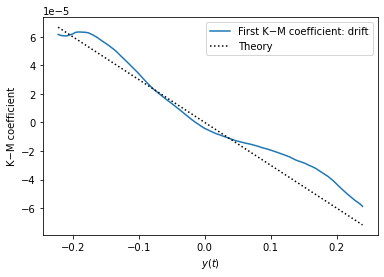

In [7]:
# Lets restrict the plot to where we have good statistics
# but include the timestep normalisation 1 / delta_t
plt.plot(edges[0][1500:-1500], kmc[1,1500:-1500], label = r'First K−M coefficient: drift')

# And to guide the eye, here is the actual theoretical value,
plt.plot(edges[0][1500:-1500], -edges[0][1500:-1500] * theta * delta_t, ':', label = r'Theory', color=r'black')

# For a physics understanding of the process, recall to always divide 
# the Kramers−Moyal coefficients by / delta_t

plt.xlabel(r'$y(t)$')
plt.ylabel(r'K−M coefficient')
plt.legend()

And now the second Kramers−Moyal coefficients, i.e., the diffusion coefficient

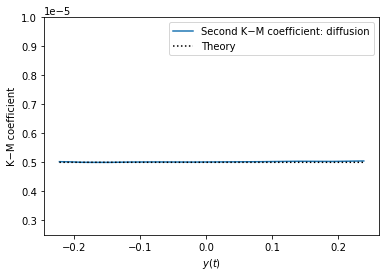

In [8]:
# Lets restrict the plot to where we have good statistics
plt.plot(edges[0][1500:-1500], kmc[2,1500:-1500], label = r'Second K−M coefficient: diffusion')

# And to guide the eye, here is the actual theoretical value,
# which is a constant of value sigma**2 * delta_t /2
plt.plot(edges[0][1500:-1500], np.ones(edges[0][1500:-1500].size) * sigma**2 * delta_t / 2, ':', label = r'Theory', color=r'black')

plt.xlabel(r'$y(t)$')
plt.ylabel(r'K−M coefficient')
plt.ylim([sigma**2 * delta_t / 4, sigma**2 * delta_t])
plt.legend()

# A 2-dimensional diffusion process

In [9]:
# Import matplotlib's 3d plotting library
from mpl_toolkits.mplot3d import Axes3D

A two-dimensionan Ornstein−Uhlenbeck  diffusion process takes the form
$$
    \begin{pmatrix}
    \mathrm{d}y_1(t) \\ \mathrm{d}y_2(t)
    \end{pmatrix}= 
    \begin{pmatrix}
     N_1(y) \\ N_2(y)
    \end{pmatrix}
    \mathrm{d} t +
    \begin{pmatrix}
    g_{1,1}(y) & g_{1,2}(y) \\
    g_{2,1}(y) & g_{2,2}(y)
    \end{pmatrix}
    \begin{pmatrix}
    \mathrm{d}W_1 \\ \mathrm{d}W_2
    \end{pmatrix}
$$
with $N$ the drift vector and $g$ the diffusion matrix, which can be state dependent

We define as the previous example a process identical to the Ornstein−Uhlenbeck process, with
$$
    N = \begin{pmatrix}
    - N_1 y_1 \\ - N_2 y_2
    \end{pmatrix}
$$
and we take $N_1=2.0$ and $N_2=1.0$.

For this particular case a more involved diffusion matrix $g$ will be used. Let the matrix $g$ be state-dependent, i.e., dependent of the actual values of $y_1$ and $y_2$ via
$$
    g = \begin{pmatrix}
    \frac{g_{1,1} }{1+e^{y_1^2}} & g_{1,2} \\
    g_{2,1} & \frac{g_{2,2} }{1+e^{y_2^2}}
    \end{pmatrix}
$$
and we will take $g_{1,1}=g_{2,2}=0.5$ $g_{1,2} = g_{2,1} = 0$

## Visualisation of the diffusion noise above in 2-dimensions

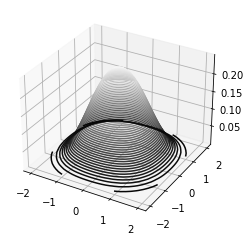

In [10]:
# Initialise the figure for 3d ploting
fig = plt.figure()
ax = fig.gca(projection='3d')

x_1 = np.linspace(-2, 2, 30)
x_2 = np.linspace(-2, 2, 30)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z = 1/(1+np.exp(X_1**2)) * 1/(1+np.exp(X_2**2))
ax.contour3D(X_1, X_2, Z, 50, cmap='gray')

plt.show()

## Integrating with an Euler−Maruyama scheme

In [11]:
# Define first the drift vector N with some exemplary values
N = np.array([2.0, 1.0])

# Define the diffusion matrix g with some exemplary values, but below
# we add a functional form to it
g = np.array([[0.5, 0.0],[0.0, 0.5]])

# The total integration time
t_start = 0
t_final = 2000

# notice in 2-dimensional we needs more points, i.e., longer integration 

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

Initialise an (n,2)-array $y$, (n,2)-normally distributed noise $\mathrm{d}W_{1,2}(t)$

In [12]:
# Initialise the array y
y = np.zeros([time.size, 2])

# Generate two Wiener processes with a scale of np.sqrt(delta_t)
dW = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = [time.size, 2])

# Give some small random initial conditions
y[0,:]=np.random.normal(size = 2) / 10

# Integrate the process (takes about 20 secs)
for i in range(1, time.size):
    y[i,0] = y[i-1,0]  -  N[0] * y[i-1,0] * delta_t + g[0,0]/(1 + np.exp(y[i-1,0]**2)) * dW[i,0]  +  g[0,1] * dW[i,1]
    y[i,1] = y[i-1,1]  -  N[1] * y[i-1,1] * delta_t + g[1,0] * dW[i,0]  +  g[1,1]/(1 + np.exp(y[i-1,1]**2)) * dW[i,1]

## Visualising the process in 2 dimensions

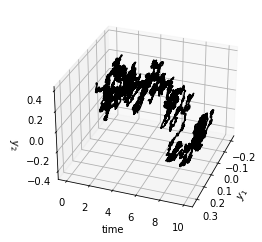

In [13]:
# Initialise the figure for 3d ploting
fig = plt.figure()
ax = fig.gca(projection='3d')

# Ploting the trajector for the first 10 time units, which are
# 10000 = 10 / delta_t data points
ax.plot(y[:10000,0], time[:10000], y[:10000,1], color='black')
ax.view_init(30, 20)

ax.set_xlabel(r'$y_1$'); ax.set_ylabel(r'time'); ax.set_zlabel(r'$y_2$');

plt.show()

## Obtaining the Kramers−Moyal coefficients in 2 dimensions

We will now implement the KM package to calculate the Kramers−Moyal coefficients

In [14]:
# Import your (favourite) package to calculate Kramers−Moyal coefficients
# You will need only km to perform the calculation
from kramersmoyal import km

In [15]:
# Choose the size of your target space in two dimensions 
bins = np.array([300, 300])
# Be careful, this is a grid with 300*300 = 90000 points. If you want something
# large, make sure not to blow up your memory

# Introduce the desired orders to calculate, but in 2 dimensions
# Please keep the [0,0] term. It is the normalisation. 
powers = np.array([[0,0], [1,0], [0,1], [1,1], [2,0], [0,2], [2,2]])
# insert into kmc:   0      1      2      3      4      5      6

# Notice that the first entry in [,] is for the first dimension, the 
# second for the second dimension...

# Choose a desired bandwidth bw
bw = 0.1

# Calculate the Kramers−Moyal coefficients
kmc, edges = km(y, bw = bw, bins = bins, powers = powers)

# The K−M coefficients are stacked along the first dim of the
# kmc array, so kmc[1,...] is the first K−M coefficient, kmc[2,...]
# is the second. These will be 2-dimensional matrices

## Visualising the 2-dimensional Kramers−Moyal coefficients

Lets visualise the Kramers−Moyal coefficients [1,0], [0,1], [2,0], and [0,2], i.e., the drifts and diffusion terms

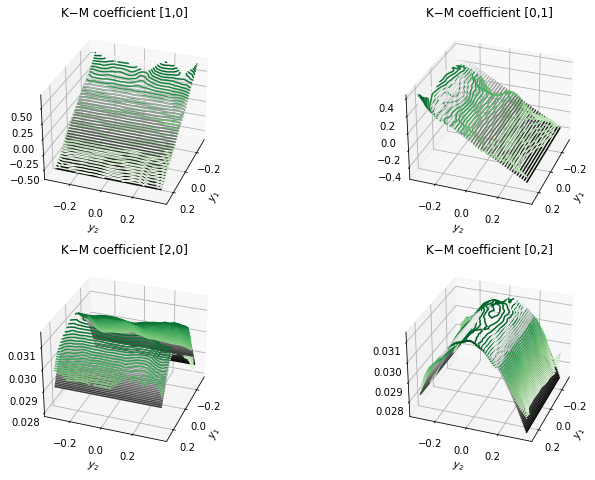

In [16]:
# Initialise the figure for 3d ploting
fig = plt.figure(figsize = (12,8))

#lets fix a range where we have good statistics and generate a meshgrid
X_1, X_2 = np.meshgrid(edges[0][80:-80],edges[1][80:-80])


# the Kramers−Moyal coefficients [1,0]
ax_00 = fig.add_subplot(2, 2, 1, projection='3d')

# kmc[1,...] i.e, power [1,0] (transpose, python stores arrays transposed)
ax_00.contour3D(X_1, X_2, kmc[1,80:-80,80:-80].T / delta_t, 50, cmap='Greens')
# The actual theoretical value
ax_00.contour3D(X_1, X_2, - X_1 * N[0], 50, cmap='gray')

ax_00.set_title(r'K−M coefficient [1,0]');


# the Kramers−Moyal coefficients [0,1]
ax_01 = fig.add_subplot(2, 2, 2, projection='3d')

# kmc[2,...] i.e, power [0,1] (transpose, python stores arrays transposed)
ax_01.contour3D(X_1, X_2, kmc[2,80:-80,80:-80].T / delta_t, 50, cmap='Greens')
# The actual theoretical value
ax_01.contour3D(X_1, X_2, - X_2 * N[1], 50, cmap='gray')

ax_01.set_title(r'K−M coefficient [0,1]');


# the Kramers−Moyal coefficients [2,0]
ax_10 = fig.add_subplot(2, 2, 3, projection='3d')

# kmc[4,...] i.e, power [2,0] (transpose, python stores arrays transposed)
ax_10.contour3D(X_1, X_2, kmc[4,80:-80,80:-80].T / delta_t, 50, cmap='Greens')
# The actual theoretical value
ax_10.contour3D(X_1, X_2,  ( g[0,0] / (1 + np.exp(X_1**2)) )**2 / 2 , 50, cmap='gray')

ax_10.set_title(r'K−M coefficient [2,0]');


# the Kramers−Moyal coefficients [0,2]
ax_11 = fig.add_subplot(2, 2, 4, projection='3d')

# kmc[5,...] i.e, power [0,2] (transpose, python stores arrays transposed)
ax_11.contour3D(X_1, X_2, kmc[5,80:-80,80:-80].T / delta_t, 50, cmap='Greens')
# The actual theoretical value
ax_11.contour3D(X_1, X_2,  ( g[1,1] / (1 + np.exp(X_2**2)) )**2 / 2 , 50, cmap='gray')

ax_11.set_title(r'K−M coefficient [0,2]');

# Rotate views and add labels
ax_00.view_init(30, 20); ax_01.view_init(30, 20); ax_10.view_init(30, 20); ax_11.view_init(30, 20)
ax_00.set_xlabel(r'$y_1$'); ax_01.set_xlabel(r'$y_1$'); ax_10.set_xlabel(r'$y_1$'); ax_11.set_xlabel(r'$y_1$')
ax_00.set_ylabel(r'$y_2$'); ax_01.set_ylabel(r'$y_2$'); ax_10.set_ylabel(r'$y_2$'); ax_11.set_ylabel(r'$y_2$')

plt.show()

# A bivariate (two-dimensional) Jump-Diffusion process

A more involved example is a bivariate Jump-Diffusion process, that takes the form
$$\begin{pmatrix}
    \mathrm{d}y_1(t) \\ \mathrm{d}y_2(t)
    \end{pmatrix}=
    \begin{pmatrix}
    N_1 \\ N_2
    \end{pmatrix}
    \mathrm{d} t +
    \begin{pmatrix}
    g_{1,1} & g_{1,2} \\
    g_{2,1} & g_{2,2}
    \end{pmatrix}
    \begin{pmatrix}
    \mathrm{d}W_1 \\ \mathrm{d}W_2
    \end{pmatrix}+
    \begin{pmatrix}
    \xi_{1,1} & \xi_{1,2} \\
    \xi_{2,1} & \xi_{2,2}
    \end{pmatrix}
    \begin{pmatrix}
    \mathrm{d}J_1 \\ \mathrm{d}J_2
    \end{pmatrix}
$$
with $(N_1, N_2)$ the drift vector, $g$ the diffusion matrix, and $\xi$ the jump matrix. The term $(\mathrm{d}W_1(t),\mathrm{d}W_2(t))$ comprises the Brownian motions and $(\mathrm{d}J_1, \mathrm{d}J_2)$ comprises the Poisson jumps.

## Integrating with an Euler−Maruyama scheme

In [17]:
# Define first the drift vector N with some exemplary values
N = np.array([1.0, 0.5])

# Define the diffusion matrix g with some exemplary values
g = np.array([[0.5, 0.2],[0.1, 1.0]])

# and the jump amplitude matrix xi
xi = np.array([[0.2, 0.5],[0.4, 0.5]])

# lastly, the jump frequency lambda (l)
l = np.array([0.1, 0.2])

# The total integration time
t_start = 0
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

Initialise an (n,2)-array $y$, (n,2)-normally distributed noise $\mathrm{d}W_{1,2}(t)$, and (n,2)-Poisson processes $\mathrm{d}J_{1,2}(t)$

In [18]:
# Initialise the array y
y = np.zeros([time.size, 2])

# Generate two Wiener processes with a scale of np.sqrt(delta_t)
dW = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = [time.size, 2])

# Generate two Poisson process with a delta_t scale
dJ = np.zeros([ time.size, 2 ])
dJ[:,0] = np.random.poisson(lam = l[0] * delta_t, size = time.size)
dJ[:,1] = np.random.poisson(lam = l[1] * delta_t, size = time.size)

# Give some small random initial conditions
y[0,:]=np.random.normal(size = 2) / 10

# Integrate the process, with a two step process
for i in range(1, time.size):
    y[i,0] = y[i-1,0]  -  N[0] * y[i-1,0] * delta_t  +  g[0,0] * dW[i,0] +  g[0,1] * dW[i,1]
    y[i,1] = y[i-1,1]  -  N[1] * y[i-1,1] * delta_t  +  g[1,0] * dW[i,0] +  g[1,1] * dW[i,1]
    
    if dJ[i,0]>0 or dJ[i,1]:
        # Generate here the normally distributed matrix xi of the jumps
        s_00 = np.random.normal(loc = 0, scale = np.sqrt(xi[0,0]))
        s_01 = np.random.normal(loc = 0, scale = np.sqrt(xi[0,1]))
        s_10 = np.random.normal(loc = 0, scale = np.sqrt(xi[1,0]))
        s_11 = np.random.normal(loc = 0, scale = np.sqrt(xi[1,1]))
        
        y[i,0] += s_00 * dJ[i,0]  +  s_01 * dJ[i,1]
        y[i,1] += s_10 * dJ[i,0]  +  s_11 * dJ[i,1]

Still in progress, now the Kramers−Moyal coefficients in two dimensions